# Kfold for classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(C = 0.5, gamma = 0.6, kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=0.5, gamma=0.6)

## Grid search

In [8]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.2, 0.4, 0.6, 0.8]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(f"Best Accuracy: {best_accuracy}")
print("Best Parameters:", best_parameters)

Best Accuracy: 0.9066666666666666
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print(cm)
print(accuracy_score(y_pred, y_test))

[[64  3]
 [ 4 29]]
0.93


## Kfold

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f"Accuracy = {accuracies.mean()}")
print(f"Standard dev = {accuracies.std()}")

Accuracy = 0.9066666666666666
Standard dev = 0.06110100926607785


## Classification metrics

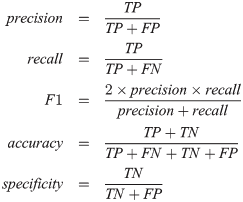